> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [NoShowAppointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
 
**Some of the questions that ill explore using the dataset No-Show appointment iclude:**
 - What is the comparison between the two instances of not showing up for an appointment and showing up for an appointment.Here to get a clear view i will plot a bar graph agaisnt the number of appointments.
 
 - Is there a correlation between the disease categories(Hipertension,Alcoholism,Diabetes,Handcap) and Age


In [31]:
# Importing statements for all of the packages necessary for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [32]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [33]:
#reading csv file
df = pd.read_csv('noshowappointments.csv')

In [34]:
# assigning  a variable df to load noshowappoitment data and printing out a few lines 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [35]:
# displays the number of rows and columns in the data set
df.shape

(110527, 14)

In [36]:
# computing a summary of statistics pertaining the dataframe(df_c)columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [37]:
# Gives a summary of the dataset
df.info()
# From the output below there seems to be no null data from the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [38]:
# To confirm the number of null values in the columns from the dataset is zero
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [39]:
# checking if there are any duplicates in the datasets 
df.duplicated().sum()

# Output 0 confirms no records have been duplicated.

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [40]:
# Grouping the data by patients ID since from the data it appears some patients had severals visitations and assigning the grouped data to a new variable new_df
new_df = df.groupby('PatientId')

# reading the grouped data
new_df.first()


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
3.921784e+04,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
4.374176e+04,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No
9.377953e+04,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
1.417242e+05,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
5.376153e+05,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
5.628261e+06,5680449,M,2016-05-10T11:58:18Z,2016-05-13T00:00:00Z,13,PARQUE MOSCOSO,0,0,0,0,0,0,Yes
1.183186e+07,5718578,M,2016-05-19T09:42:07Z,2016-05-19T00:00:00Z,16,SANTO ANTÔNIO,0,0,0,0,0,0,No
2.263866e+07,5580835,F,2016-04-14T07:23:30Z,2016-05-03T00:00:00Z,22,INHANGUETÁ,0,0,0,0,0,1,No
5.216894e+07,5607220,F,2016-04-20T11:22:15Z,2016-05-17T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No


In [41]:
# Displays all column titles in the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [42]:
# sorting the data in ascending order inorder to test for outliers.
df_sorted = df.sort_values(by ='Age',ascending = True)
print('df in Ascending Order: ',df_sorted)

df in Ascending Order:             PatientId  AppointmentID Gender          ScheduledDay  \
99832   4.659432e+14        5775010      F  2016-06-06T08:58:13Z   
34218   3.469431e+12        5649465      F  2016-05-03T06:57:26Z   
102834  4.882675e+10        5659726      F  2016-05-04T14:35:59Z   
102832  9.726846e+12        5749887      F  2016-05-31T08:19:38Z   
102830  2.845290e+13        5664173      M  2016-05-05T11:24:09Z   
...              ...            ...    ...                   ...   
63915   3.196321e+13        5700279      F  2016-05-16T09:17:44Z   
76284   3.196321e+13        5744037      F  2016-05-30T09:44:51Z   
68127   3.196321e+13        5562812      F  2016-04-08T14:29:17Z   
63912   3.196321e+13        5700278      F  2016-05-16T09:17:44Z   
97666   7.482346e+14        5717451      F  2016-05-19T07:57:56Z   

              AppointmentDay  Age  Neighbourhood  Scholarship  Hipertension  \
99832   2016-06-06T00:00:00Z   -1          ROMÃO            0             0   
3

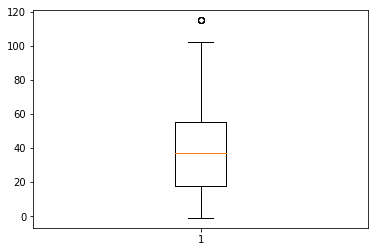

In [43]:
# checking for outliers
plt.boxplot(df_sorted['Age']);
# This indicates there is an outlier in the dataset

The above plot is a box plot that shows the existence of ouliers in the dataset the outliers are seen to be above the value 100.
Outliers are values that lie abnormally far fromthe values of the given dataset hence might not affect the results of the dataset.

In [44]:
# creating a function to obtain the value of the outlier 
# Lowerbound 
Q1 = df['Age'].quantile(0.25)
# Upperbound
Q3 = df['Age'].quantile(0.75)
# Interquantile range
IQR = Q3-Q1
def outliers (df):
    outliers_r = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return outliers_r


In [45]:
# getting the value of the outlier
out = outliers(df['Age'])
print (out)

63912    115
63915    115
68127    115
76284    115
97666    115
Name: Age, dtype: int64


In [46]:
# dropping the upper bound outliers
df.drop(out)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [47]:
# converting patientid to int before ploting age against no show
df['PatientId'] = df['PatientId'].astype(int)

In [48]:
# confirming conversion of patient id
df.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [49]:
# dropping unnecessary columns
df.drop(labels =['Neighbourhood','ScheduledDay','AppointmentDay'],axis =1)

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,62,0,1,0,0,0,0,No
1,558997776694438,5642503,M,56,0,0,0,0,0,0,No
2,4262962299951,5642549,F,62,0,0,0,0,0,0,No
3,867951213174,5642828,F,8,0,0,0,0,0,0,No
4,8841186448183,5642494,F,56,0,1,1,0,0,0,No
5,95985133231274,5626772,F,76,0,1,0,0,0,0,No
6,733688164476661,5630279,F,23,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,39,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,21,0,0,0,0,0,0,No
9,78124564369297,5629123,F,19,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




### Research Question 1 (Comparison of totals of showing up and not showing up.)


In [50]:
# confirming the unique terms in no show
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
# grouping the data
df_noshow = df.groupby(['No-show'])['PatientId'].agg('count')
print(df_noshow)

No-show
No     88208
Yes    22319
Name: PatientId, dtype: int64


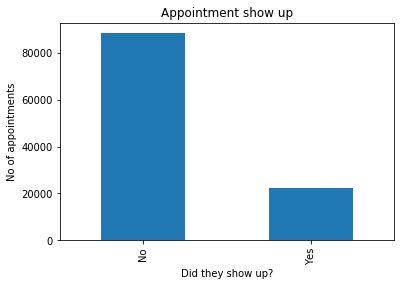

In [52]:
# plotting the no show and yes show to see what instance happens alot
df_noshow.plot(kind= 'bar')
plt.title('Appointment show up')
plt.ylabel('No of appointments')
plt.xlabel('Did they show up?')
plt.show()


From the plot above No show appointments are more than the yes show appointments meaning most appoitments end up not being met by the patients.


### Research Question 2 (Is there any correlation between the diseases and age)

In [53]:
# changing boolean type age to int yes =0 and no to 1
def no_show(df):
    if df['No-show'] == ('Yes'):
        return 0
    else:
        return 1
    no_show(df)

In [54]:
# To find the correlation between the diseases and age using the pearson method
df[['Hipertension','Diabetes','Alcoholism','Handcap','Age']].corr(method ='pearson')

,Hipertension,Diabetes,Alcoholism,Handcap,Age
Hipertension,1.000000,0.433086,0.087971,0.080083,0.504586
Diabetes,0.433086,1.000000,0.018474,0.057530,0.292391
Alcoholism,0.087971,0.018474,1.000000,0.004648,0.095811
Handcap,0.080083,0.057530,0.004648,1.000000,0.078033
Age,0.504586,0.292391,0.095811,0.078033,1.000000


In [55]:
# correlation of hipertension and age
y1 =df[['Hipertension','Age']].corr(method ='pearson')
print (y1)


              Hipertension       Age
Hipertension      1.000000  0.504586
Age               0.504586  1.000000


There is a positive correlation meaning as age increases the chance of having hipertension increases 50.4% chance

In [56]:
# correlation of diabetes and age
y2 =df[['Diabetes','Age']].corr(method ='pearson')
print (y2)


          Diabetes       Age
Diabetes  1.000000  0.292391
Age       0.292391  1.000000


There is a positive correlation meaning as age increases the chance of having diabetes increases by 29.2%

In [57]:
# correlation of alcoholism and age
y3 =df[['Alcoholism','Age']].corr(method ='pearson')
print (y3)


            Alcoholism       Age
Alcoholism    1.000000  0.095811
Age           0.095811  1.000000


There is a positive correlation as age increases the posibility oof  alcoholism increases by 9.5%

In [58]:
# correlation of being hancap and age
y4 =df[['Handcap','Age']].corr(method ='pearson')
print (y4)


          Handcap       Age
Handcap  1.000000  0.078033
Age      0.078033  1.000000


There is a positive correlation being hancap is 7.8%.
Correlation between age and being handcap is the least compared to all the other variables.

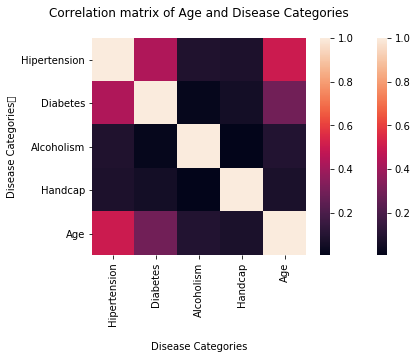

In [59]:
# creating a heatmap to show correlation
sns.heatmap(df[['Hipertension','Diabetes','Alcoholism','Handcap','Age']].corr())

plt.savefig("Plotting_Correlation_HeatMap.jpg")
hm = sns.heatmap(df[['Hipertension','Diabetes','Alcoholism','Handcap','Age']].corr(), annot = False)
hm.set(xlabel='\nDisease Categories', ylabel='Disease Categories\t', title = "Correlation matrix of Age and Disease Categories\n")

plt.show()

Here the dark color shows the high correlation between the values and the light colors shows less correlation between the variables.
From the heatmap above some of the variables that have high correlation are;
Diabetes and Alcoholism ,Alcoholism and Handcap,Alcoholism and Diabetes.

From the heatmap above some of the variables that have low correlation are;
Hipertension and Age.

<a id='conclusions'></a>
## Conclusions
In conclusion there are more instances of failed appontments by the patients.More research on how to reduce defaulting appointments should be done to help improve the situation.For instance one could explore the times of the week or month patients are likely to show up and maximize on that.
 
Correlation between the diseases and ages could be used to prevent occurence of the instances.For instance there is a very high correlation between between hipertension and age(50.4%) by statistics this could be true and way to avoid this could be explored.Followed by the correlation between Diabetes and Age (29.2%).
All correlations are positive meaning as age increases the chances of getting either of the disease increases.


### Limitations
Some of the Limitations of in the case study may include;
-Some of the attributes are unlikely to be correlated whatsover in an ideal environment eg age and being handcaped which is a disability and does not depend on age.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0